In [27]:
# Import the necessary libraries
import pandas as pd
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [28]:
# Read the file 'backprop.csv'
df = pd.read_csv('.\\backprop.csv')


In [29]:
# Take a quick look at your dataset
df.head()


,x,y
0,-5.00000,0.006693
1,-4.98999,0.006760
2,-4.97998,0.006827
3,-4.96997,0.006895
4,-4.95996,0.006964


In [30]:
# Assign the predictor and response data values to x and y variable
# x = df.x.values
# y = df.y.values
x = df['x']
y = df['y']


In [31]:
# Define the neural network model given by the figure in the instructions
my_model = Sequential()
my_model.add(Dense(1, input_dim=1, activation='relu'))
my_model.add(Dense(3, activation=tf.math.sin))
# my_model.add(Dense(16, activation='sigmoid'))
my_model.add(Dense(1, activation=tf.math.sin))


# Take a look at the model summary
my_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 3)                 6         
                                                                 
 dense_24 (Dense)            (None, 1)                 4         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [36]:
print(my_model.get_weights())

[array([[-0.9652291]], dtype=float32), array([0.], dtype=float32), array([[-1.1588687 , -0.14465868, -0.14542341]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[-0.00956595],
       [-0.79926014],
       [ 0.33810234]], dtype=float32), array([0.], dtype=float32)]


32/32 [==============================] - 0s 4ms/step


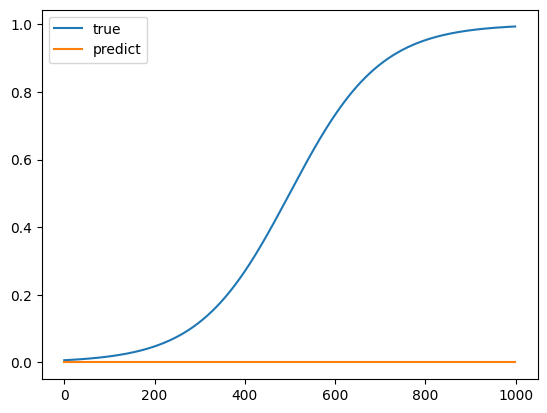

In [32]:
# Plot the true data and the predictions of your neural network
pred_1 = my_model.predict(y)

plt.plot(y, label='true')
plt.plot(pred_1, label='predict')
plt.legend()
plt.show()

In [44]:
## Using Backpropagation to find the gradients and update
## Remember to use gradient tape 

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

epochs = 2000
losses = []

for e in range(epochs):
    with tf.GradientTape() as tape:
        pred = my_model(x.values)
        loss = loss_fn(y, pred)
        losses.append(loss)
    gradiants = tape.gradient(loss, my_model.trainable_variables)
    optimizer.apply_gradients(zip(gradiants,my_model.trainable_variables))


In [45]:
for i in losses:
    print(i)

tf.Tensor(0.15878986, shape=(), dtype=float32)
tf.Tensor(0.15852535, shape=(), dtype=float32)
tf.Tensor(0.15826812, shape=(), dtype=float32)
tf.Tensor(0.15801816, shape=(), dtype=float32)
tf.Tensor(0.15777558, shape=(), dtype=float32)
tf.Tensor(0.15754052, shape=(), dtype=float32)
tf.Tensor(0.15731297, shape=(), dtype=float32)
tf.Tensor(0.15709288, shape=(), dtype=float32)
tf.Tensor(0.15688021, shape=(), dtype=float32)
tf.Tensor(0.15667471, shape=(), dtype=float32)
tf.Tensor(0.15647669, shape=(), dtype=float32)
tf.Tensor(0.1562857, shape=(), dtype=float32)
tf.Tensor(0.15610181, shape=(), dtype=float32)
tf.Tensor(0.15592504, shape=(), dtype=float32)
tf.Tensor(0.15575524, shape=(), dtype=float32)
tf.Tensor(0.15559213, shape=(), dtype=float32)
tf.Tensor(0.15543607, shape=(), dtype=float32)
tf.Tensor(0.1552866, shape=(), dtype=float32)
tf.Tensor(0.1551436, shape=(), dtype=float32)
tf.Tensor(0.15500717, shape=(), dtype=float32)
tf.Tensor(0.15487672, shape=(), dtype=float32)
tf.Tensor(0.1547

32/32 [==============================] - 0s 3ms/step


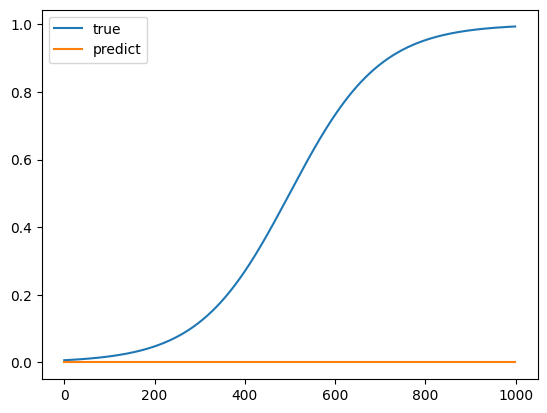

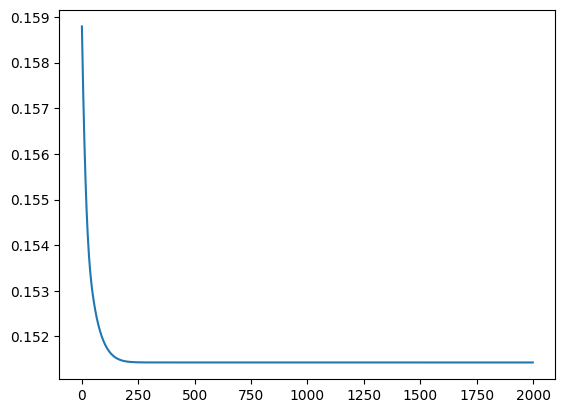

In [46]:
# Plot the neural network predictions, 
predict = my_model.predict(x)
plt.plot(y, label='true')
plt.plot(pred_1, label='predict')
plt.legend()
plt.show()

# and the loss landscape
plt.plot(losses)
plt.show()
